In [1]:
!pip install datasets

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/Flask-2.0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/Flask_Cors-4.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/Flask_Compress-1.15-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/gnnlens-0.1.0-py3.11.egg is deprecated. pip 24.3 will 

In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("OGB/ogbg-molhiv")

In [4]:
dataset = dataset.shuffle(seed=0)

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['edge_index', 'edge_attr', 'y', 'num_nodes', 'node_feat'],
        num_rows: 32901
    })
    validation: Dataset({
        features: ['edge_index', 'edge_attr', 'y', 'num_nodes', 'node_feat'],
        num_rows: 4113
    })
    test: Dataset({
        features: ['edge_index', 'edge_attr', 'y', 'num_nodes', 'node_feat'],
        num_rows: 4113
    })
})


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
graph = dataset["train"][0] #we want to plot the first graph

In [8]:
print(graph)

{'edge_index': [[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 5, 7, 5, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 13, 16, 16, 17, 16, 18, 18, 19, 18, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 4, 26, 26, 27, 27, 1, 15, 10, 25, 20, 25, 13], [1, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 5, 8, 5, 9, 8, 10, 9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 13, 17, 16, 18, 16, 19, 18, 20, 18, 21, 20, 22, 21, 23, 22, 24, 23, 25, 24, 26, 4, 27, 26, 1, 27, 10, 15, 20, 25, 13, 25]], 'edge_attr': [[0, 0, 0], [0, 0, 0], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 1], [1, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 0, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0, 1], [3, 0

In [9]:
edges = graph["edge_index"]

In [10]:
print(edges)

[[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 5, 7, 5, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 13, 16, 16, 17, 16, 18, 18, 19, 18, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 4, 26, 26, 27, 27, 1, 15, 10, 25, 20, 25, 13], [1, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 5, 8, 5, 9, 8, 10, 9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 13, 17, 16, 18, 16, 19, 18, 20, 18, 21, 20, 22, 21, 23, 22, 24, 23, 25, 24, 26, 4, 27, 26, 1, 27, 10, 15, 20, 25, 13, 25]]


In [11]:
num_edges = len(edges[0])

In [12]:
print(num_edges)

62


In [13]:
num_nodes = graph["num_nodes"]

In [14]:
print(num_nodes)

28


In [15]:
G = nx.Graph()

In [16]:
G.add_nodes_from(range(num_nodes)) #여기서 range함수는 연속된 함수를 만들어내는데 사용됨.

In [17]:
G.add_edges_from([(edges[0][i], edges[1][i]) for i in range(num_edges)])

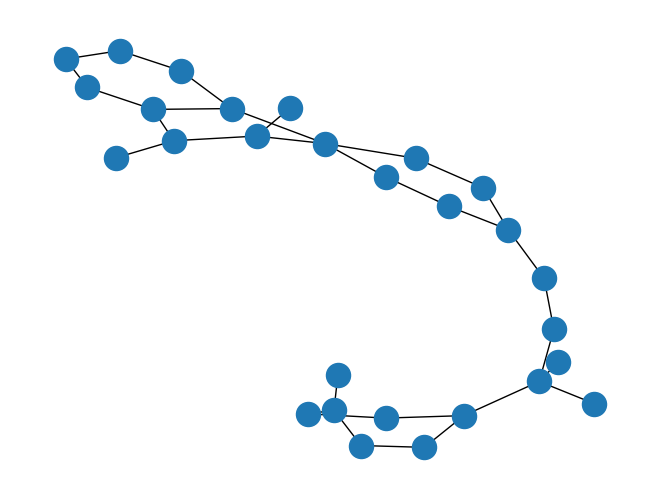

In [18]:
nx.draw(G)

In [19]:
print("Label:", graph['y'])

Label: [0]


In [20]:
from transformers.models.graphormer.collating_graphormer import preprocess_item, GraphormerDataCollator

dataset_processed = dataset.map(preprocess_item, batched=False)

In [21]:
# split up training into training + validation
train_ds = dataset_processed['train']
val_ds = dataset_processed['validation']

In [22]:
print(train_ds[0].keys())

dict_keys(['edge_index', 'edge_attr', 'y', 'num_nodes', 'node_feat', 'input_nodes', 'attn_bias', 'attn_edge_type', 'spatial_pos', 'in_degree', 'out_degree', 'input_edges', 'labels'])


In [23]:
from transformers import GraphormerForGraphClassification

model_checkpoint = "clefourrier/graphormer-base-pcqm4mv2" # pre-trained model from which to fine-tune

model = GraphormerForGraphClassification.from_pretrained(
    model_checkpoint, 
    num_classes=2,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of GraphormerForGraphClassification were not initialized from the model checkpoint at clefourrier/graphormer-base-pcqm4mv2 and are newly initialized because the shapes did not match:
- classifier.classifier.weight: found shape torch.Size([1, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "graph-classification",
    logging_dir="graph-classification",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    auto_find_batch_size=True,
    gradient_accumulation_steps=10,
    dataloader_num_workers=4,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    push_to_hub=False,
    fp16=True
)

In [25]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=GraphormerDataCollator()
)

/opt/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [26]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

wandb: Currently logged in as: mhsr21 (trincoll). Use `wandb login --relogin` to force relogin


Could not estimate the number of tokens of the input, floating-point operations will not be computed


Epoch,Training Loss,Validation Loss
0,0.161800,0.093477
1,0.140900,0.079461
2,0.126100,0.077577
3,0.114700,0.075119
4,0.109100,0.072148


***** train metrics *****
  epoch                    =        5.0
  total_flos               =        0GF
  train_loss               =     0.1305
  train_runtime            = 4:43:28.77
  train_samples_per_second =      9.672
  train_steps_per_second   =      0.242


In [27]:
print(train_results.metrics)

{'train_runtime': 17008.775, 'train_samples_per_second': 9.672, 'train_steps_per_second': 0.242, 'total_flos': 0.0, 'train_loss': 0.13053468578923358, 'epoch': 5.0}
